In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

In [9]:
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):        
        super(ThreeLayersNet, self).__init__()     # конструктор         
        self.fc1 = nn.Linear(nX, nH1)              # створення параметрів моделі
        self.fc2 = nn.Linear(nH1, nH2)             # у повнозв'язкових шарах
        self.fc3 = nn.Linear(nH2, nY)
          
    def forward(self, x):                          # задаємо прямий прохід
        x = self.fc1(x)                            # вихід першого шару
        x = nn.Sigmoid()(x)                        # сигмоїдна активація
        x = self.fc2(x)                            # вихід другого шару
        x = nn.Sigmoid()(x)                        # сигмоїдна активація
        x = self.fc3(x)
        x = nn.Sigmoid()(x)
        return x

In [10]:
X = torch.rand(1200, 2)
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1, 1)

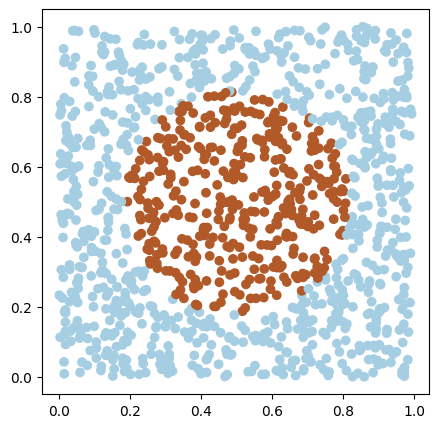

In [11]:
plt.figure(figsize=(5, 5))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired)        
plt.show()

In [12]:
model = ThreeLayersNet(2, 5, 4, 1)                                  
 
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.8)

In [13]:
def fit(model, X,Y, batch_size=100, train=True):    
      model.train(train)                                 
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size ) 
       
      for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]                          # поточний батч
        yb = Y[i: i+batch_size]                          # тензори поточного батчу
                      
        y = model(xb)                                    # пряме розповсюдження
        L = loss(y, yb)                                  # похибка
  
        if train:                                        # в режимі навчання
            optimizer.zero_grad()                        # обнуляємо градієнти,        
            L.backward()                                 # обчислюємо градієнти,            
            optimizer.step()                             # підганяємо параметри
                                     
        sumL += L.item()                                 # сумарна похибка
        sumA += (y.round() == yb).float().mean()         # точність визначення окремого класу
         
        return sumL/numB,  sumA/numB   

In [14]:

                                                         # режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )
 
epochs = 10000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model, X, Y)                               # по всьому датасету
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0506 accuracy: 0.0592
epoch:     0 loss: 0.0504 accuracy: 0.0592
epoch:   100 loss: 0.0502 accuracy: 0.0592
epoch:   200 loss: 0.0502 accuracy: 0.0592
epoch:   300 loss: 0.0502 accuracy: 0.0592
epoch:   400 loss: 0.0502 accuracy: 0.0592
epoch:   500 loss: 0.0502 accuracy: 0.0592
epoch:   600 loss: 0.0501 accuracy: 0.0592
epoch:   700 loss: 0.0501 accuracy: 0.0592
epoch:   800 loss: 0.0501 accuracy: 0.0592
epoch:   900 loss: 0.0499 accuracy: 0.0592
epoch:  1000 loss: 0.0496 accuracy: 0.0592
epoch:  1100 loss: 0.0487 accuracy: 0.0592
epoch:  1200 loss: 0.0473 accuracy: 0.0592
epoch:  1300 loss: 0.0457 accuracy: 0.0592
epoch:  1400 loss: 0.0424 accuracy: 0.0592
epoch:  1500 loss: 0.0347 accuracy: 0.0658
epoch:  1600 loss: 0.0332 accuracy: 0.0642
epoch:  1700 loss: 0.0327 accuracy: 0.0633
epoch:  1800 loss: 0.0294 accuracy: 0.0683
epoch:  1900 loss: 0.0123 accuracy: 0.0808
epoch:  2000 loss: 0.0066 accuracy: 0.0817
epoch:  2100 loss: 0.0049 accuracy: 0.0817
epoch:  220

In [15]:
print(model)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=1, bias=True)
)


In [16]:
dict(model.named_parameters())

{'fc1.weight': Parameter containing:
 tensor([[  3.1528,  -9.1953],
         [-11.0133, -11.4043],
         [  9.9853,  -5.9407],
         [  0.0655,   0.2126],
         [  0.4989,  -3.2434]], requires_grad=True),
 'fc1.bias': Parameter containing:
 tensor([ 1.7138, 14.8935, -0.0428,  2.8003,  0.4387], requires_grad=True),
 'fc2.weight': Parameter containing:
 tensor([[-2.3952e-02,  4.2250e-01,  9.4833e-01,  4.5500e-01, -6.3862e-03],
         [ 8.3160e+00, -7.4447e+00, -7.8919e+00,  2.5234e+00,  1.3934e+00],
         [-9.6774e+00,  8.6248e+00,  9.1516e+00, -3.5052e+00, -1.4948e+00],
         [ 1.0858e+01, -9.5954e+00, -1.0184e+01,  3.9750e+00,  1.4073e+00]],
        requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([ 0.6442,  5.4546, -5.8318,  6.4844], requires_grad=True),
 'fc3.weight': Parameter containing:
 tensor([[  2.5805, -14.4193,  18.7453, -18.8913]], requires_grad=True),
 'fc3.bias': Parameter containing:
 tensor([3.2247], requires_grad=True)}

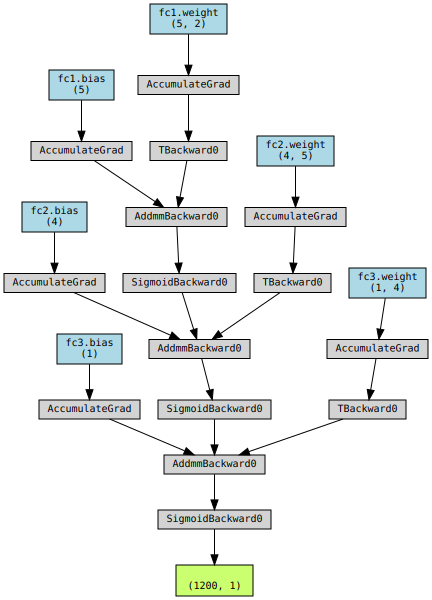

In [17]:
torchviz.make_dot(model(X), params = dict(model.named_parameters()))